In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Check for missing values and dataset info
print("Missing values:\n", data.isnull().sum())
print("\nDataset info:\n", data.info())
print("\nFirst few rows of the dataset:\n", data.head())



Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard  

In [2]:
print("\nNumber of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])



Number of rows:  10000
Number of columns:  14


In [3]:
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# One hot encoding for Geography
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)


In [4]:
# Split the dataset into training and test sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize continuous variables
scaler = StandardScaler()
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])


In [5]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


Logistic Regression:
 Accuracy: 0.8115
 Precision: 0.5563380281690141
 Recall: 0.2010178117048346
 F1 Score: 0.2953271028037383



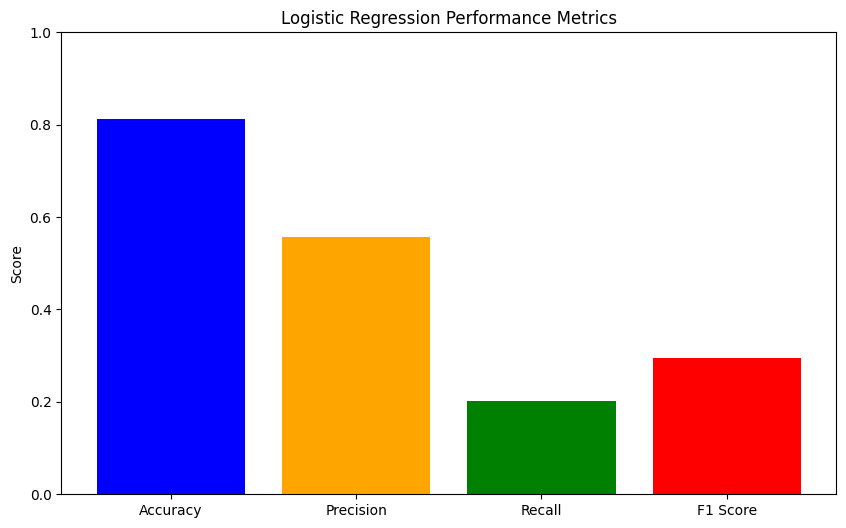

Decision Tree:
 Accuracy: 0.776
 Precision: 0.43792325056433407
 Recall: 0.49363867684478374
 F1 Score: 0.46411483253588515



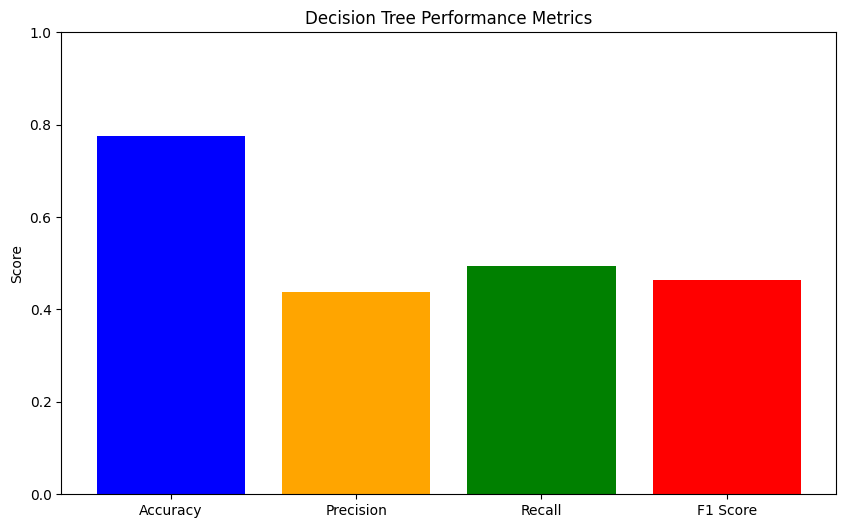

Random Forest:
 Accuracy: 0.863
 Precision: 0.7428571428571429
 Recall: 0.4631043256997455
 F1 Score: 0.5705329153605015



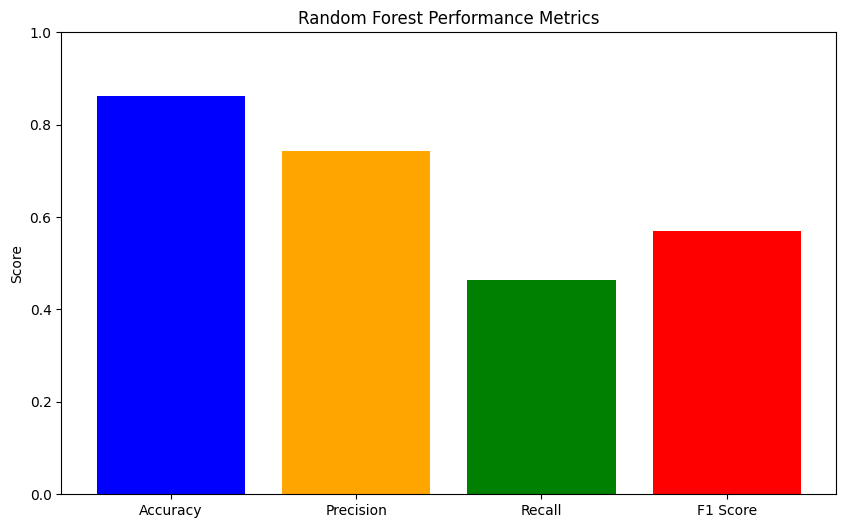

Support Vector Machine:
 Accuracy: 0.8535
 Precision: 0.7840909090909091
 Recall: 0.3511450381679389
 F1 Score: 0.4850615114235501



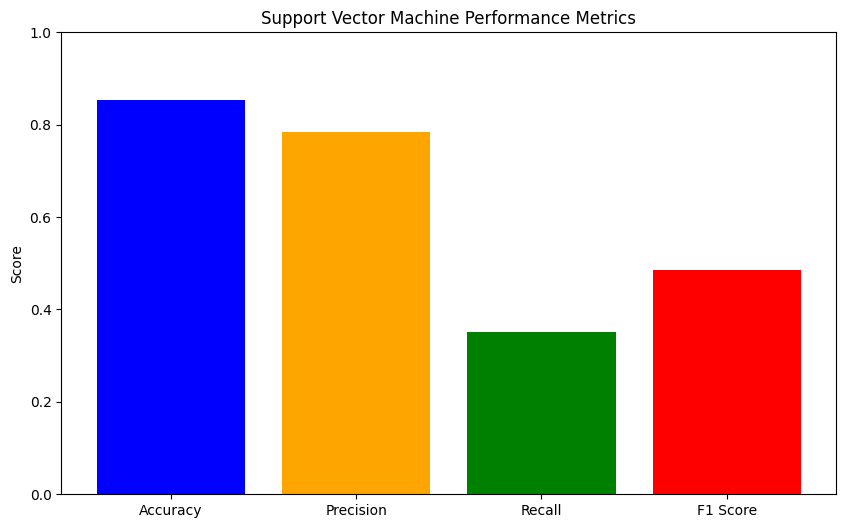

In [6]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f'{model_name}:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n')

    # Plot bar graph for the model's performance metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
    plt.title(f'{model_name} Performance Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()


In [18]:
# Determine the best model
best_model_name = max(results, key=lambda k: results[k]['F1 Score'])
best_model = models[best_model_name]
print(f'The best model is {best_model_name} with an F1 Score of {results[best_model_name]["F1 Score"]}')



The best model is Random Forest with an F1 Score of 0.5830721003134797


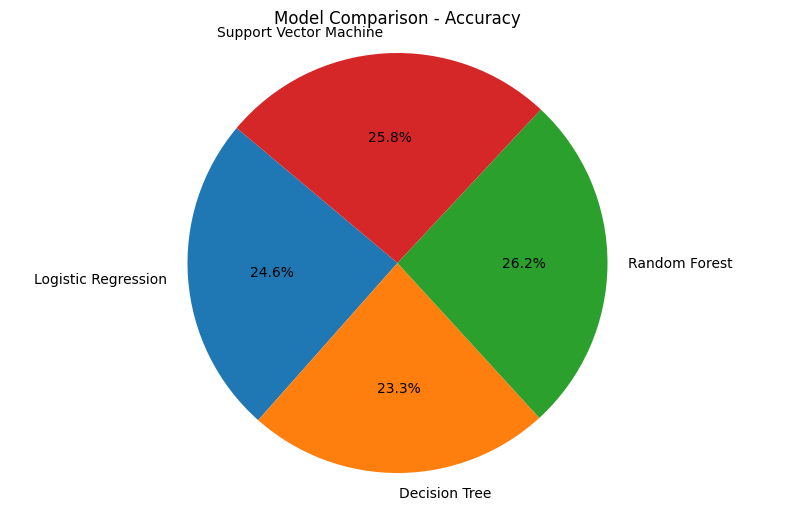

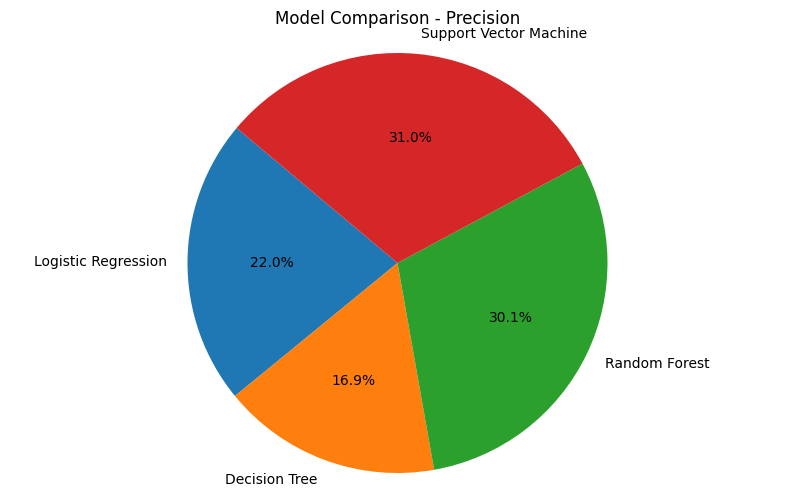

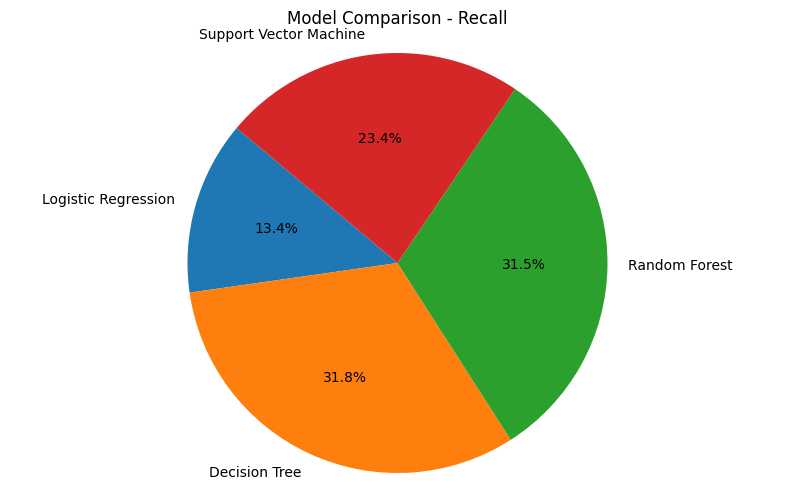

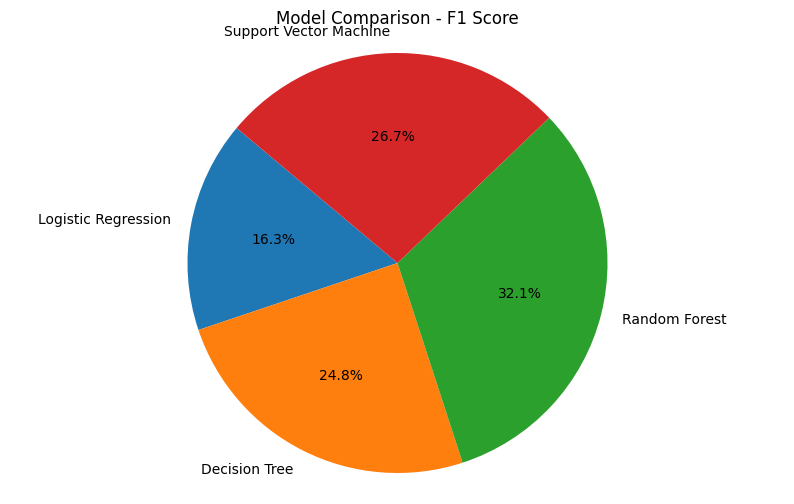

In [19]:
# Visualize model performance comparison
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.figure(figsize=(10, 6))
    plt.pie([results[model][metric] for model in results], labels=results.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Model Comparison - {metric}')
    plt.axis('equal')
    plt.show()
